# III. Visualizing Volatility and Rates of Return


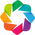

In [5]:
#import matplotlib
import poloniex
import datetime
import holoviews as hv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream
hv.notebook_extension('bokeh')

In [6]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=720)
keys = ['BTC/USDT',
 'DASH/USDT',
 'LTC/USDT',
 'NXT/USDT',
 'XLM/USDT',
 'XMR/USDT',
 'XRP/USDT',
 'ETH/USDT',
 'ETC/USDT',
 'REP/USDT',
 'ZEC/USDT',
 'BCH/USDT']

btc = poloniex.get_ohlc('USDT_BTC', start,end)
dash = poloniex.get_ohlc('USDT_BTC', start,end)
ether = poloniex.get_ohlc('USDT_ETH',start, end)

AttributeError: module 'poloniex' has no attribute 'get_ohlc'

Let's check which currencies on poloniex have been traded for more than a year

In [5]:
def load_symbol(symbol, **kwargs):
    df = data[symbol]
    #df.reset_index(level=0, inplace=True)
    df['date'] = df.index
    return hv.Curve(df, ('date', 'Date'), ('close', 'Close price'))

stock_symbols = ['ETH', 'BTC',]
data = {"ETH": ether, 'BTC':btc}
dmap = hv.DynamicMap(load_symbol, kdims='Symbol').redim.values(Symbol=stock_symbols)

In [6]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
def rolling_vol(w, symbol):
    dt = data[symbol]
    S = dt['close'].rolling(w).std()
    dt['Volatility'] = S
    dt['date'] = ether.index

    return hv.Curve(dt.iloc[-2000:], ('date', 'Date'), ('Volatility','Rolling volatility'))

stock_symbols = ['ETH', 'BTC',]
data = {"ETH": ether, 'BTC':btc}    
winsize = range(10,60,2)
rvol = hv.DynamicMap(rolling_vol, kdims=['Wsize', 'Symbol']).redim.values(Symbol=stock_symbols).redim.range(Wsize=(10,60))
rvol

:DynamicMap   [Wsize,Symbol]

In [7]:
ether['5m_return'] = ether.close/ether.close.shift(1) - 1
btc['5m_return'] = btc.close/btc.close.shift(1) - 1

In [8]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
hv.Curve(ether[-10000:], ('date', 'Date'),('5m_return', '5m Return rate'), label='Ether returns').hist(num_bins=150)

:AdjointLayout
   :Curve   [date]   (5m_return)
   :Histogram   _return]   (5m_return_frequency)

# IV. Visualizing Sharpe Ratio for BTC/USDT